In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_data_2007_2014.csv to loan_data_2007_2014.csv


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

pd.set_option('display.max_columns', None)
display(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'loan_data_2007_2014.csv'

# **1. DATA UNDERSTANDING**

In [ ]:
#Dimensi Dataset
print(data.shape) #(baris, kolom)

(466285, 75)


In [ ]:
#Nama Column
print(data.columns.tolist())

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_

In [ ]:
#Tipe Data
print(data.dtypes)

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object


# **2. FEATURED ENGINEERING**

In [ ]:
#Memilih fitur yang ingin digunakan untuk menilai score credit

selected_features = [
    # Keuangan
    "annual_inc", "dti", "loan_amnt", "installment", "int_rate", "funded_amnt",

    # Credit history
    "delinq_2yrs", "mths_since_last_delinq", "pub_rec", "open_acc", "total_acc",

    # Loan characteristics
    "purpose", "grade", "sub_grade", "term",

    # Demografi & pekerjaan
    "emp_length", "home_ownership",

    # Target
    "loan_status"   # label (approved/rejected)
]
df=data[selected_features]

print(df.shape)
print(df.dtypes)


(466285, 18)
annual_inc                float64
dti                       float64
loan_amnt                   int64
installment               float64
int_rate                  float64
funded_amnt                 int64
delinq_2yrs               float64
mths_since_last_delinq    float64
pub_rec                   float64
open_acc                  float64
total_acc                 float64
purpose                    object
grade                      object
sub_grade                  object
term                       object
emp_length                 object
home_ownership             object
loan_status                object
dtype: object


In [ ]:
# Jumlah Data Kosong
import pandas as pd

pd.set_option("display.max_rows", None)   # tampilkan semua baris
pd.set_option("display.max_columns", None)  # tampilkan semua kolom

# Hitung jumlah & persentase missing value
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Gabungkan jadi DataFrame
missing_df = pd.DataFrame({
    'Jumlah Kosong': missing_count,
    'Persentase (%)': missing_percent
})

# Hanya tampilkan kolom yang punya missing
missing_df = missing_df[missing_df['Jumlah Kosong'] > 0]

# Urutkan dari paling banyak missing
missing_df = missing_df.sort_values(by='Jumlah Kosong', ascending=False)

print(missing_df)

                        Jumlah Kosong  Persentase (%)
mths_since_last_delinq         250351       53.690554
emp_length                      21008        4.505399
delinq_2yrs                        29        0.006219
open_acc                           29        0.006219
pub_rec                            29        0.006219
total_acc                          29        0.006219
annual_inc                          4        0.000858


In [ ]:
#Statistik Data Numerik
print(df.describe())

         annual_inc            dti      loan_amnt    installment  \
count  4.662810e+05  466285.000000  466285.000000  466285.000000   
mean   7.327738e+04      17.218758   14317.277577     432.061201   
std    5.496357e+04       7.851121    8286.509164     243.485550   
min    1.896000e+03       0.000000     500.000000      15.670000   
25%    4.500000e+04      11.360000    8000.000000     256.690000   
50%    6.300000e+04      16.870000   12000.000000     379.890000   
75%    8.896000e+04      22.780000   20000.000000     566.580000   
max    7.500000e+06      39.990000   35000.000000    1409.990000   

            int_rate    funded_amnt    delinq_2yrs  mths_since_last_delinq  \
count  466285.000000  466285.000000  466256.000000           215934.000000   
mean       13.829236   14291.801044       0.284678               34.104430   
std         4.357587    8274.371300       0.797365               21.778487   
min         5.420000     500.000000       0.000000                0.000000 

In [ ]:
#Statistik Data kategorik
print(df.describe(include=['object']))

                   purpose   grade sub_grade        term emp_length  \
count               466285  466285    466285      466285     445277   
unique                  14       7        35           2         11   
top     debt_consolidation       B        B3   36 months  10+ years   
freq                274195  136929     31686      337953     150049   

       home_ownership loan_status  
count          466285      466285  
unique              6           9  
top          MORTGAGE     Current  
freq           235875      224226  


# **2. EXPLORATORY DATA ANALYSIS (EDA)**


In [ ]:
df[['loan_amnt','funded_amnt']].plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)

NameError: name 'df' is not defined

<Axes: xlabel='funded_amnt', ylabel='loan_amnt'>

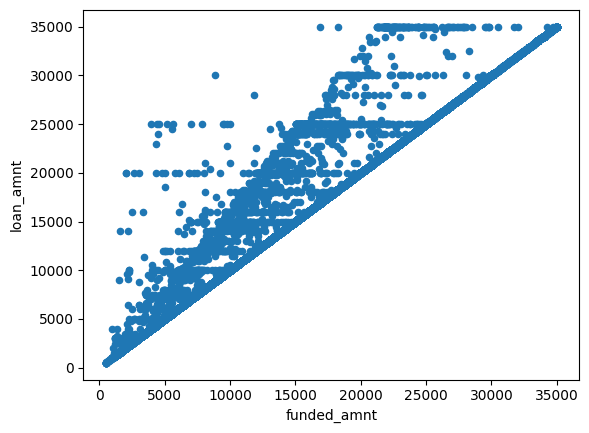

In [ ]:
#Scatterplot untuk mengetahui sebaran Loan Amount terhadap Funded Amount
df.plot.scatter(x='funded_amnt', y='loan_amnt')

<Axes: xlabel='home_ownership'>

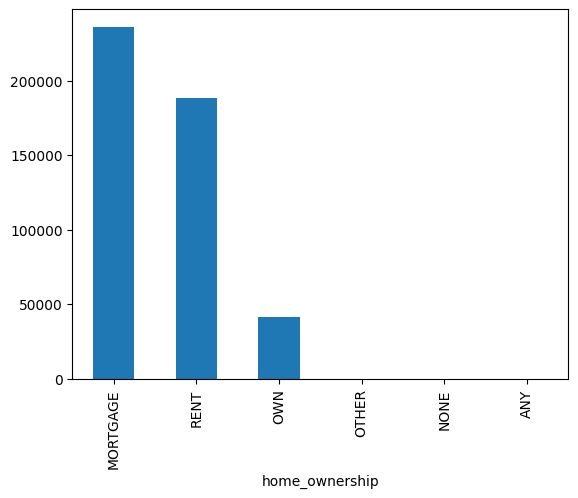

In [ ]:
#Barplot Proporsi Kepemilikan Rumah
df['home_ownership'].value_counts().plot(kind='bar')

<Axes: xlabel='purpose'>

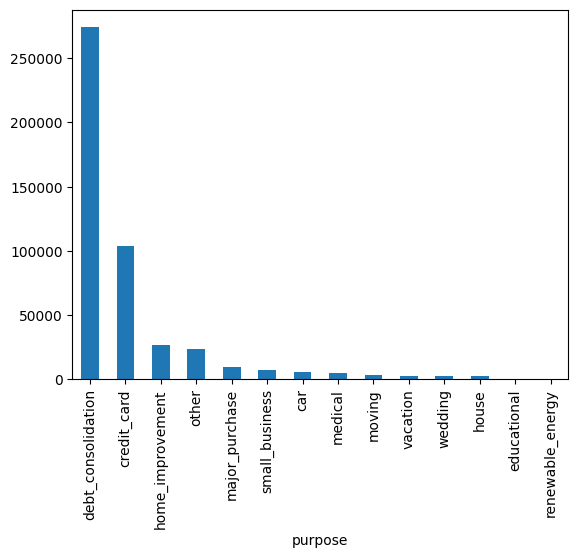

In [ ]:
#Barplot Proporsi Kategori Permintaan Pinjaman
df['purpose'].value_counts().plot(kind='bar')

# **Bivariate Analysis**

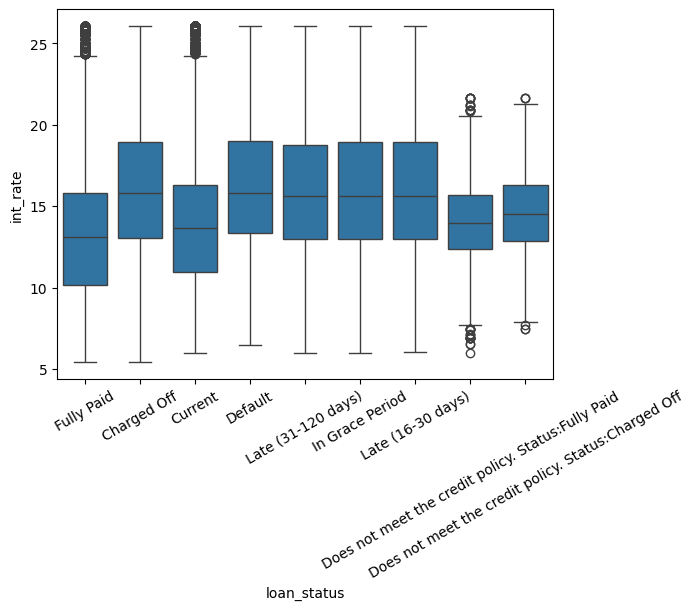

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'loan_status', y = 'int_rate', data = df)
plt.xticks(rotation=30)
plt.tight_layout
plt.show()

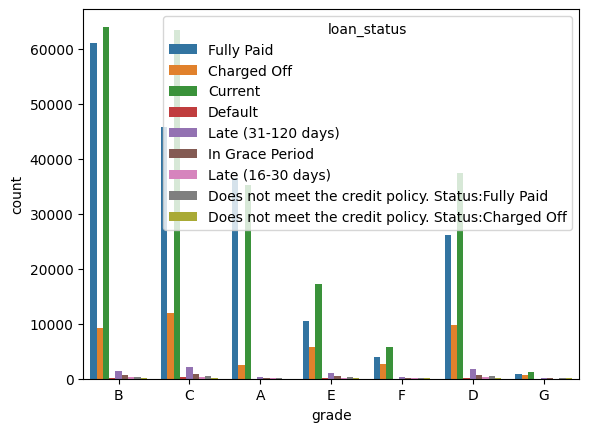

In [ ]:
sns.countplot(x="grade",hue="loan_status", data=df)
plt.show()

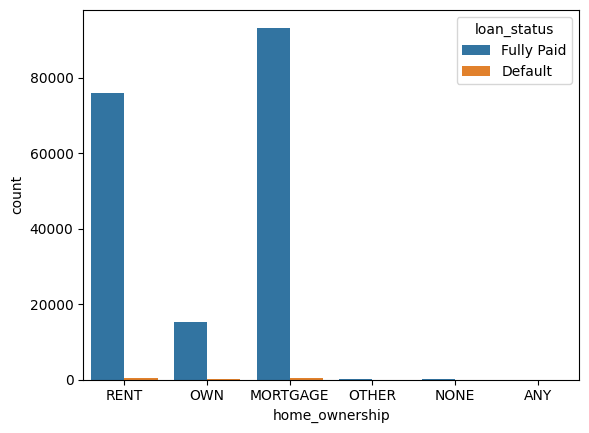

In [ ]:
subset=data[df["loan_status"].isin(["Fully Paid","Default"])]

sns.countplot(x="home_ownership", hue="loan_status", data=subset)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


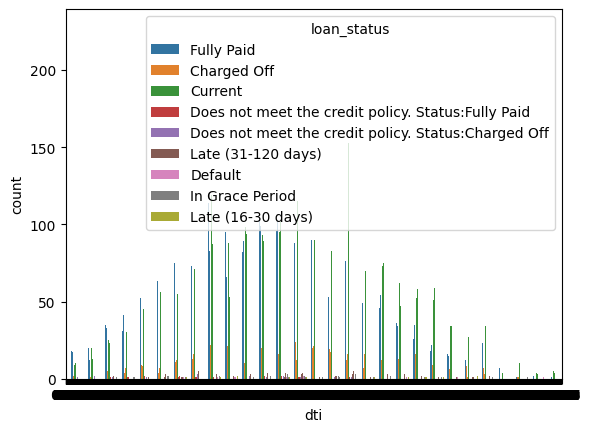

<Figure size 1000x200 with 0 Axes>

In [ ]:
subset = df[df['loan_status'].isin(['Fully Paid','Charged Off','Default'])]

sns.countplot(x="dti", hue="loan_status", data=df)
plt.figure(figsize=(10,2))
plt.show()

# **Korelasi**

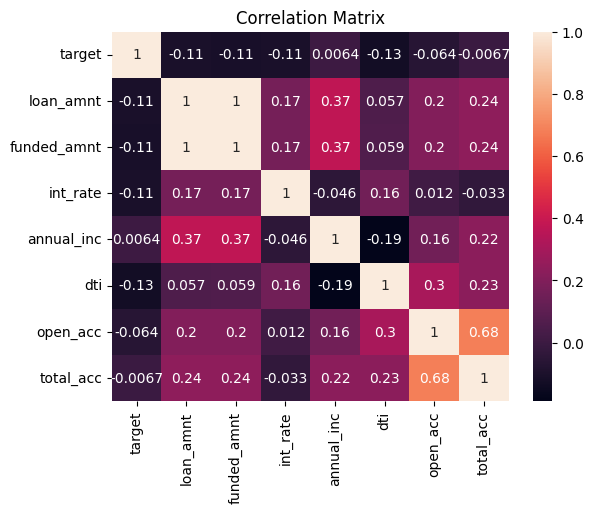

In [ ]:
df["target"]=df["loan_status"].apply(lambda x: 1 if x=="Fully Paid" else 0)

selected_cols= ['target','loan_amnt','funded_amnt','int_rate','annual_inc','dti','open_acc','total_acc']
subset=df[selected_cols]

corr = subset.corr(method="pearson")

sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

# **Outlier**

/tmp/ipython-input-136913192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_inc_log'] = np.log1p(df['annual_inc'])


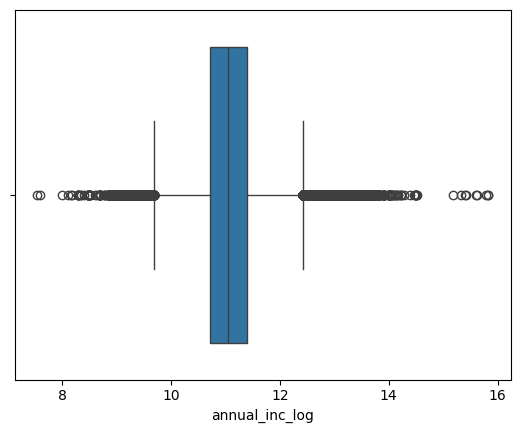

In [ ]:
import numpy as np
df['annual_inc_log'] = np.log1p(df['annual_inc'])
sns.boxplot(x=df['annual_inc_log'])
plt.show()

# **3. DATA PREPARATION**

In [ ]:
#Handling missing values
df_clean = df.copy() #copy df ke dataframe baru

#Mengubah file NaN ke 0 atau median
df_clean = df_clean.fillna({
    "mths_since_last_delinq": 0,
    "emp_length": 0,
    "delinq_2yrs": 0,
    "pub_rec": 0,
    "total_acc": 0,
    "open_acc": 0,
    "annual_inc": df["annual_inc"].median(),
    "annual_inc_log": df["annual_inc_log"].median()
})

In [ ]:
print(df_clean.dtypes)

annual_inc                float64
dti                       float64
loan_amnt                   int64
installment               float64
int_rate                  float64
funded_amnt                 int64
delinq_2yrs               float64
mths_since_last_delinq    float64
pub_rec                   float64
open_acc                  float64
total_acc                 float64
purpose                    object
grade                      object
sub_grade                  object
term                       object
emp_length                 object
home_ownership             object
loan_status                object
target                      int64
annual_inc_log            float64
dtype: object


In [ ]:
#Standarisasi data dengan mengubah tipe data menjadi numeric
df_clean = pd.get_dummies(df_clean, columns=['grade', 'sub_grade', 'home_ownership', 'purpose'], drop_first=True)


In [ ]:
#Standarisasi loan_status dengan disederhanakan karena terlalu banyak kategori, diubah ke 1=GOOD, 0=BAD dan menghapus kategori ambigu seperti CURRENT
def map_loan_status(x):
    x = str(x).lower()
    if "charged off" in x or "default" in x or "late" in x:
        return 1   # gagal bayar
    elif "fully paid" in x:
        return 0   # lunas
    else:
        return np.nan  # status ambigu, nanti bisa di-drop

df_clean["loan_sts"] = df_clean["loan_status"].apply(map_loan_status)

# Drop data dengan status ambigu
df_clean = df_clean.dropna(subset=["loan_sts"])
df_clean["loan_sts"] = df_clean["loan_sts"].astype(int)

#Mengubah term 36 months dan 60 monthsm menjadi numerik
df_clean["term"]=df_clean["term"].astype(str)
df_clean["term"]=df_clean["term"].str.replace(" months", "").astype(int)

#Mengubah emp_lenght menjadi numerik
import numpy as np

def clean_emp_length(x):
    if pd.isnull(x) or x == "n/a":
        return 0
    elif "<" in x:
        return 0
    elif "10+" in x:
        return 10
    else:
        return int(x.split()[0])

df_clean["emp_length"] = df_clean["emp_length"].astype(str)
df_clean["emp_length"] = df_clean["emp_length"].apply(clean_emp_length).astype(int)


print(df_clean.dtypes)

annual_inc                    float64
dti                           float64
loan_amnt                       int64
installment                   float64
int_rate                      float64
funded_amnt                     int64
delinq_2yrs                   float64
mths_since_last_delinq        float64
pub_rec                       float64
open_acc                      float64
total_acc                     float64
term                            int64
emp_length                      int64
loan_status                    object
target                          int64
annual_inc_log                float64
grade_B                          bool
grade_C                          bool
grade_D                          bool
grade_E                          bool
grade_F                          bool
grade_G                          bool
sub_grade_A2                     bool
sub_grade_A3                     bool
sub_grade_A4                     bool
sub_grade_A5                     bool
sub_grade_B1

In [ ]:
display(df_clean.head())

,annual_inc,dti,loan_amnt,installment,int_rate,funded_amnt,delinq_2yrs,mths_since_last_delinq,pub_rec,open_acc,total_acc,term,emp_length,loan_status,target,annual_inc_log,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_sts
0,24000.0,27.65,5000,162.87,10.65,5000,0.0,0.0,0.0,3.0,9.0,36,10,Fully Paid,1,10.085851,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0
1,30000.0,1.00,2500,59.83,15.27,2500,0.0,0.0,0.0,3.0,4.0,60,0,Charged Off,0,10.308986,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,12252.0,8.72,2400,84.33,15.96,2400,0.0,0.0,0.0,2.0,10.0,36,10,Fully Paid,1,9.413526,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0
3,49200.0,20.00,10000,339.31,13.49,10000,0.0,35.0,0.0,10.0,37.0,36,10,Fully Paid,1,10.803669,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0
5,36000.0,11.20,5000,156.46,7.90,5000,0.0,0.0,0.0,9.0,12.0,36,3,Fully Paid,1,10.491302,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0


In [ ]:
#Dataframe ini yang digunakan untuk modelling

df_fix = df_clean.copy()
df_fix = df_fix.drop(columns=["loan_status"])

display(df_fix.head())
print(df_fix.dtypes)

,annual_inc,dti,loan_amnt,installment,int_rate,funded_amnt,delinq_2yrs,mths_since_last_delinq,pub_rec,open_acc,total_acc,term,emp_length,target,annual_inc_log,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_sts
0,24000.0,27.65,5000,162.87,10.65,5000,0.0,0.0,0.0,3.0,9.0,36,10,1,10.085851,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0
1,30000.0,1.00,2500,59.83,15.27,2500,0.0,0.0,0.0,3.0,4.0,60,0,0,10.308986,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,12252.0,8.72,2400,84.33,15.96,2400,0.0,0.0,0.0,2.0,10.0,36,10,1,9.413526,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0
3,49200.0,20.00,10000,339.31,13.49,10000,0.0,35.0,0.0,10.0,37.0,36,10,1,10.803669,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0
5,36000.0,11.20,5000,156.46,7.90,5000,0.0,0.0,0.0,9.0,12.0,36,3,1,10.491302,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0


annual_inc                    float64
dti                           float64
loan_amnt                       int64
installment                   float64
int_rate                      float64
funded_amnt                     int64
delinq_2yrs                   float64
mths_since_last_delinq        float64
pub_rec                       float64
open_acc                      float64
total_acc                     float64
term                            int64
emp_length                      int64
target                          int64
annual_inc_log                float64
grade_B                          bool
grade_C                          bool
grade_D                          bool
grade_E                          bool
grade_F                          bool
grade_G                          bool
sub_grade_A2                     bool
sub_grade_A3                     bool
sub_grade_A4                     bool
sub_grade_A5                     bool
sub_grade_B1                     bool
sub_grade_B2

In [ ]:
#Membuat Split Data Train dan Data Test
from sklearn.model_selection import train_test_split

x = df_fix.drop(columns=["loan_sts"])
y = df_fix["loan_sts"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)
print("\nDistribusi kelas di Train:\n", y_train.value_counts(normalize=True))
print("\nDistribusi kelas di Test:\n", y_test.value_counts(normalize=True))

print(df_fix.isnull().sum())

Train set: (191130, 73) (191130,)
Test set: (47783, 73) (47783,)

Distribusi kelas di Train:
 loan_sts
0    0.781751
1    0.218249
Name: proportion, dtype: float64

Distribusi kelas di Test:
 loan_sts
0    0.780843
1    0.219157
Name: proportion, dtype: float64
annual_inc                    0
dti                           0
loan_amnt                     0
installment                   0
int_rate                      0
funded_amnt                   0
delinq_2yrs                   0
mths_since_last_delinq        0
pub_rec                       0
open_acc                      0
total_acc                     0
term                          0
emp_length                    0
target                        0
annual_inc_log                0
grade_B                       0
grade_C                       0
grade_D                       0
grade_E                       0
grade_F                       0
grade_G                       0
sub_grade_A2                  0
sub_grade_A3                  0
su

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Train set:", x_train_resampled.shape, y_train_resampled.shape)
print("\nDistribusi kelas di Train:\n", y_train_resampled.value_counts(normalize=True))

Train set: (298832, 73) (298832,)

Distribusi kelas di Train:
 loan_sts
1    0.5
0    0.5
Name: proportion, dtype: float64


# **MODELLING**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression(max_iter=5000,solver="saga", random_state=42)
logreg.fit(x_train_resampled, y_train_resampled)
y_pred = logreg.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:",roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))

[[21021 16290]
 [ 4179  6293]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67     37311
           1       0.28      0.60      0.38     10472

    accuracy                           0.57     47783
   macro avg       0.56      0.58      0.53     47783
weighted avg       0.71      0.57      0.61     47783

ROC-AUC: 0.6091685312718141


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_resampled, y_train_resampled)
ypred_rf=rf.predict(x_test)

print("Random Forest Classifier")
print(confusion_matrix(y_test, ypred_rf))
print(classification_report(y_test, ypred_rf))
print("ROC-AUC:",roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))

Random Forest Classifier
[[36950   361]
 [    8 10464]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     37311
           1       0.97      1.00      0.98     10472

    accuracy                           0.99     47783
   macro avg       0.98      0.99      0.99     47783
weighted avg       0.99      0.99      0.99     47783

ROC-AUC: 0.998884118764788


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf=RandomForestClassifier(n_estimators=200, random_state=42)

kfold= KFold(n_splits=5, shuffle=True, random_state=42)

scores=cross_val_score(rf, x_train_resampled, y_train_resampled, cv=kfold, scoring="accuracy")

print("Accuracy tiap fold:", scores)
print("Rata-rata accuracy:", np.mean(scores))
print("Std dev:", np.std(scores))

Accuracy tiap fold: [0.99462914 0.99519802 0.9949135  0.99462905 0.99457886]
Rata-rata accuracy: 0.9947897137932532
Std dev: 0.00023583478135168786


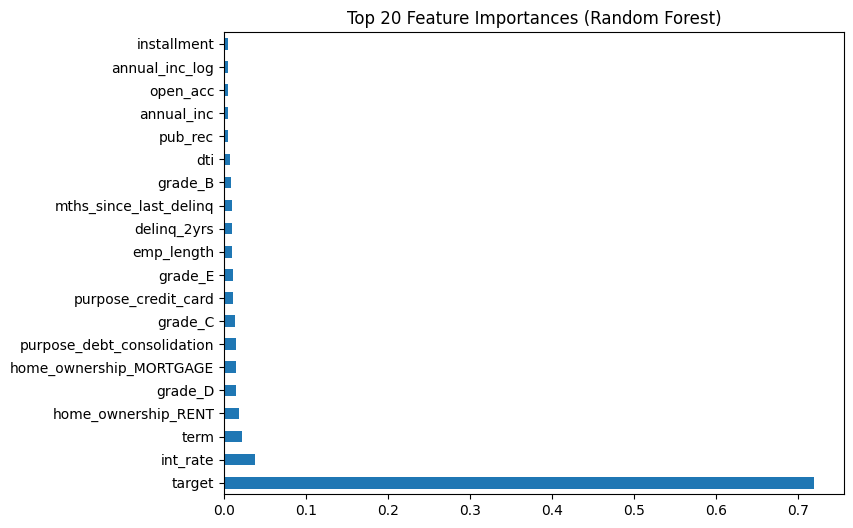

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

importances = pd.Series(rf.feature_importances_, index=x_train_resampled.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

In [ ]:
#Menghapus fitur "target" dan melakukan pemodelan ulang
# Fitur: semua kolom kecuali target & label
x = df_fix.drop(columns=['loan_sts','target', 'grade_B', 'grade_C', 'grade_D',
                         'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3',
                         'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
                         'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
                         'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
                         'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
                         'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
                         'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
                         'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
                         'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
                errors='ignore')

# Label: hanya loan_sts
y = df_fix["loan_sts"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)
print("\nDistribusi kelas di Train:\n", y_train.value_counts(normalize=True))
print("\nDistribusi kelas di Test:\n", y_test.value_counts(normalize=True))

Train set: (191130, 32) (191130,)
Test set: (47783, 32) (47783,)

Distribusi kelas di Train:
 loan_sts
0    0.781751
1    0.218249
Name: proportion, dtype: float64

Distribusi kelas di Test:
 loan_sts
0    0.780843
1    0.219157
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Train set:", x_train_resampled.shape, y_train_resampled.shape)
print("\nDistribusi kelas di Train:\n", y_train_resampled.value_counts(normalize=True))

Train set: (298832, 32) (298832,)

Distribusi kelas di Train:
 loan_sts
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression(max_iter=1000,solver="saga", random_state=42)
logreg.fit(x_train_resampled, y_train_resampled)
y_pred = logreg.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:",roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))

[[21061 16250]
 [ 4218  6254]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67     37311
           1       0.28      0.60      0.38     10472

    accuracy                           0.57     47783
   macro avg       0.56      0.58      0.53     47783
weighted avg       0.71      0.57      0.61     47783

ROC-AUC: 0.6083760241763638


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Random Forest Classifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_resampled, y_train_resampled)
ypred_rf=rf.predict(x_test)

print("Random Forest Classifier")
print(confusion_matrix(y_test, ypred_rf))
print(classification_report(y_test, ypred_rf))
print("ROC-AUC:",roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))

Random Forest Classifier
[[35162  2149]
 [ 8668  1804]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     37311
           1       0.46      0.17      0.25     10472

    accuracy                           0.77     47783
   macro avg       0.63      0.56      0.56     47783
weighted avg       0.73      0.77      0.73     47783

ROC-AUC: 0.6833919130159831


In [ ]:
#Random Forest Classifier dengan Balanced
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

rf_balanced=RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42, n_jobs=-1)
rf_balanced.fit(x_train, y_train)
ypred_rf=rf_balanced.predict(x_test)

print("Random Forest Classifier dengan Balanced")
print(confusion_matrix(y_test, ypred_rf))
print(classification_report(y_test, ypred_rf))
print("ROC-AUC:",roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))

Random Forest Classifier dengan Balanced
[[36568   743]
 [ 9693   779]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     37311
           1       0.51      0.07      0.13     10472

    accuracy                           0.78     47783
   macro avg       0.65      0.53      0.50     47783
weighted avg       0.73      0.78      0.71     47783

ROC-AUC: 0.6833919130159831


In [ ]:
#Cross Validation

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf=RandomForestClassifier(n_estimators=200, random_state=42)

kfold= KFold(n_splits=5, shuffle=True, random_state=42)

scores=cross_val_score(rf, x_train_resampled, y_train_resampled, cv=kfold, scoring="accuracy")

print("Accuracy tiap fold:", scores)
print("Rata-rata accuracy:", np.mean(scores))
print("Std dev:", np.std(scores))

Accuracy tiap fold: [0.85575652 0.85441799 0.85587123 0.85433189 0.85595489]
Rata-rata accuracy: 0.8552665054562427
Std dev: 0.0007311852566532314


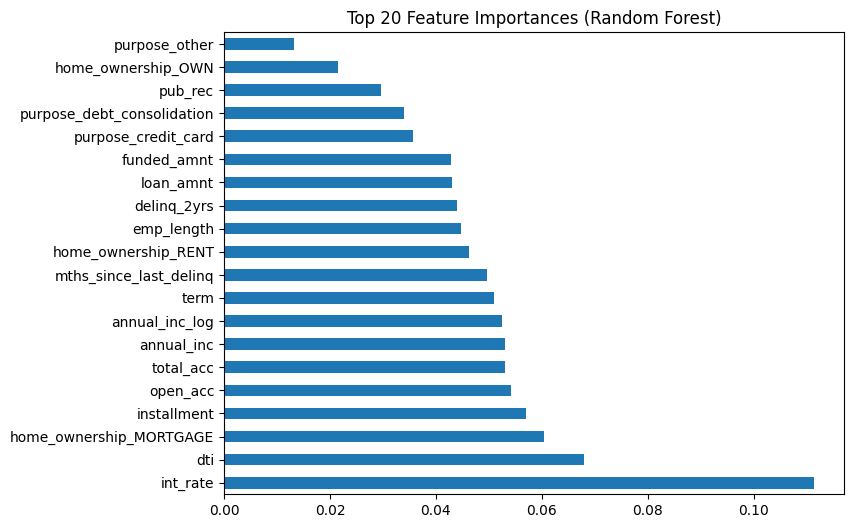

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

importances = pd.Series(rf.feature_importances_, index=x_train_resampled.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

In [ ]:
#Menghapus fitur "target" dan melakukan pemodelan ulang
# Fitur: semua kolom kecuali target & label
x = df_fix.drop(columns=["loan_sts","target"], errors="ignore")

# Label: hanya loan_sts
y = df_fix["loan_sts"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)
print("\nDistribusi kelas di Train:\n", y_train.value_counts(normalize=True))
print("\nDistribusi kelas di Test:\n", y_test.value_counts(normalize=True))

Train set: (191130, 72) (191130,)
Test set: (47783, 72) (47783,)

Distribusi kelas di Train:
 loan_sts
0    0.781751
1    0.218249
Name: proportion, dtype: float64

Distribusi kelas di Test:
 loan_sts
0    0.780843
1    0.219157
Name: proportion, dtype: float64


In [ ]:
#cOBA UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

print("Sebelum Undersampling:", y_train.value_counts())
print("Sesudah Undersampling:", y_train_rus.value_counts())

Sebelum Undersampling: loan_sts
0    149416
1     41714
Name: count, dtype: int64
Sesudah Undersampling: loan_sts
0    41714
1    41714
Name: count, dtype: int64


In [ ]:
# Logistic Regression Dengan Under Sampling

from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000,solver="saga", random_state=42)
logreg.fit(x_train_rus, y_train_rus)
y_pred = logreg.predict(x_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:",roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))

[[21055 16256]
 [ 4174  6298]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67     37311
           1       0.28      0.60      0.38     10472

    accuracy                           0.57     47783
   macro avg       0.56      0.58      0.53     47783
weighted avg       0.71      0.57      0.61     47783

ROC-AUC: 0.6119239080575983


In [ ]:
#Random Forest Classifier Dengan Under Sampling
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_rus, y_train_rus)
ypred_rf=rf.predict(x_test)

print("Random Forest Classifier")
print(confusion_matrix(y_test, ypred_rf))
print(classification_report(y_test, ypred_rf))
print("ROC-AUC:",roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))

Random Forest Classifier
[[23717 13594]
 [ 3682  6790]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.73     37311
           1       0.33      0.65      0.44     10472

    accuracy                           0.64     47783
   macro avg       0.60      0.64      0.59     47783
weighted avg       0.75      0.64      0.67     47783

ROC-AUC: 0.6933937022220205


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Range parameter yang lebih kecil supaya cepat
param_dist = {
    'n_estimators': [100, 200],        # jumlah pohon
    'max_depth': [None, 10, 20],       # kedalaman
    'min_samples_split': [2, 5],       # min split
    'min_samples_leaf': [1, 2],        # min leaf
    'max_features': ['sqrt'],          # default umum
    'class_weight': ['balanced']       # untuk imbalance
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,             # hanya coba 5 kombinasi
    scoring='roc_auc',    # fokus pada AUC
    cv=3,                 # 3-fold cross validation
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)


In [ ]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)
y_proba = best_rf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

[[24027 13284]
 [ 3689  6783]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.74     37311
           1       0.34      0.65      0.44     10472

    accuracy                           0.64     47783
   macro avg       0.60      0.65      0.59     47783
weighted avg       0.75      0.64      0.67     47783

ROC-AUC: 0.6996950651144257


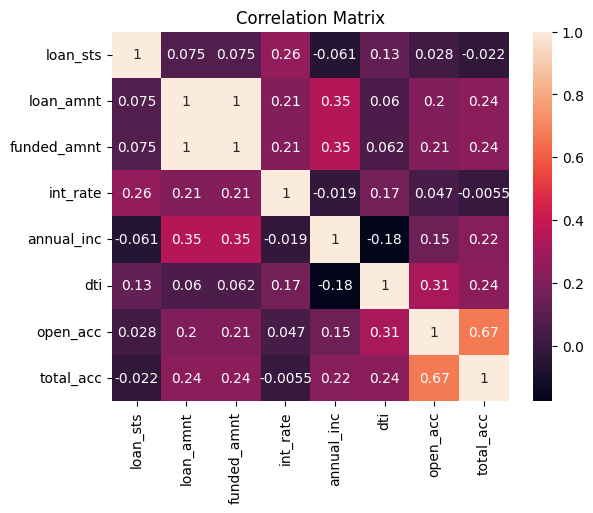

In [ ]:
selected_cols= ['loan_sts','loan_amnt','funded_amnt','int_rate','annual_inc','dti','open_acc','total_acc']
subset=df_fix[selected_cols]

corr = subset.corr(method="pearson")

sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()